In [8]:
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os

In [18]:


# Initialize the FDSN client, for example, from IRIS or a regional network provider
client = Client("IRIS")

# Define station parameters
network = "YW"
station = "MSWL6"
location = "00"
channel = "BHZ"

# Define a time window for the search
start_time = UTCDateTime("2024-11-12T01:12:30")
end_time = UTCDateTime("2024-11-12T01:13:30")

# Request data
try:
    st = client.get_waveforms(network=network, station=station, location=location, 
                              channel=channel, starttime=start_time, endtime=end_time)
    print(st)
except Exception as e:
    print(f"Data retrieval failed: {e}")

1 Trace(s) in Stream:
YW.MSWL6.00.BHZ | 2024-11-12T01:12:30.000000Z - 2024-11-12T01:13:30.000000Z | 40.0 Hz, 2401 samples


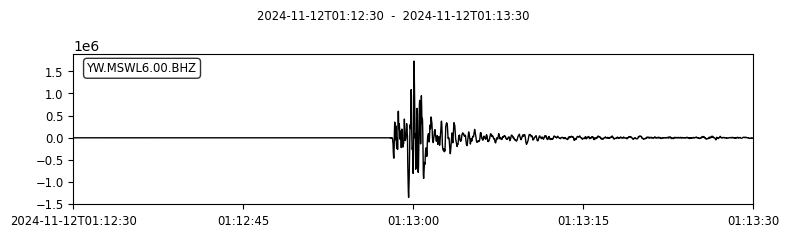

In [19]:
st.plot();

In [24]:
for tr in st:
    print(f"Station: {tr.stats.station}")
    #print(f"Latitude: {tr.stats.latitude}")

Station: foo


In [9]:
# Directory to save MiniSEED files
output_dir = "miniseed_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through stations MSWL0 to MSWL8
for i in range(9):  # Station MSWL0 to MSWL8
    station = f"MSWL{i}"
    
    try:
        # Request waveform data for the current station
        st = client.get_waveforms(network=network, station=station, location=location, 
                                  channel=channel, starttime=start_time, endtime=end_time)
        
        if len(st) > 0:
            # If the stream is not empty, save it as MiniSEED
            filename = os.path.join(output_dir, f"{station}_BHZ.mseed")
            st.write(filename, format="MSEED")
            print(f"Data for {station} saved to {filename}")
        else:
            print(f"No data available for {station}")
    
    except Exception as e:
        print(f"Error retrieving data for {station}: {e}")

Error retrieving data for MSWL0: No data available for request.
HTTP Status code: 204
Detailed response of server:


Data for MSWL1 saved to miniseed_data/MSWL1_BHZ.mseed
Data for MSWL2 saved to miniseed_data/MSWL2_BHZ.mseed
Error retrieving data for MSWL3: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error retrieving data for MSWL4: No data available for request.
HTTP Status code: 204
Detailed response of server:


Data for MSWL5 saved to miniseed_data/MSWL5_BHZ.mseed
Data for MSWL6 saved to miniseed_data/MSWL6_BHZ.mseed
Error retrieving data for MSWL7: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error retrieving data for MSWL8: No data available for request.
HTTP Status code: 204
Detailed response of server:




# Meta data (for location with Waves)

Meta Data and Station.xml

If you have opened a MiniSEED file from a folder that also contains a related station.xml file,
the .xml file contents will be displayed in the tab. 
If there is no .xml file, Waves will look up the IRIS DMC for a channel that matches 
the station/network/location ID and automatically populate the meta data fields. 
Waves will also store the station.xml file in your user/eqsuitefiles/response 
folder for future use.